In [1]:
"""Plot of RHS in L1 error"""

'Plot of RHS in L1 error'

We plot the RHS in the $L_1$ error between $\mathcal{L}_{t}$ and $\mathcal{L}_{t}^{PCA}$

For any $p \geq 1$, plot of

$$ \frac{1}{n} \sum_{i=1}^{n} \Lambda^{i} \, \left(\frac{\sum_{k=3}^{n} \nu^{k} \times (u^{i, k})^{2}}{\sum_{k=1}^{n} \nu^{k} \times (u^{i, k})^{2}}\right)^{\frac{p}{2(p+1)}}. $$

Define also $C_{p} = \frac{9}{\sqrt{\pi}} \Gamma(\frac{1+p}{2})^{\frac{1}{p+1}}$. To simplify, we take $\Lambda^i = 1$ for all $i$.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from utils import set_plot_style

set_plot_style()
%config InlineBackend.figure_format = 'retina'

In [ ]:
def rhs_func(n, p, b_min, b_max, t=1.0):
    """RHS function for the L1 error bound."""
    b = np.random.uniform(b_min, b_max, size=n)
    b_rep = np.tile(b, (n, 1))
    rho = np.random.uniform(-1, 1, size=n)
    rho_rep = np.tile(rho, (n, 1))
    cov_x = (rho_rep * rho_rep.T) * (1 - np.exp(-(b_rep + b_rep.T) * t))
    cov_x /= b_rep + b_rep.T
    u, eig_x, _ = np.linalg.svd(cov_x)
    num = np.sum(eig_x[2:, None] * u[2:, :] ** 2, axis=0)
    denom = np.sum(eig_x[:, None] * u[:, :] ** 2, axis=0)
    res = np.sum(pow(num / denom, 0.5 * p / (p + 1)))
    return res / n


def mc_rhs_func(tab_n, n_mc, p, b_min, b_max):
    """Monte Carlo simulation for the RHS function."""
    _bound = np.zeros(tab_n.shape[0])
    _bound_err = np.zeros(tab_n.shape[0])

    for idx in tqdm(range(tab_n.shape[0])):
        lst = []
        for _ in range(n_mc):
            _rhs = rhs_func(n=tab_n[idx], p=p, b_min=b_min, b_max=b_max)
            lst.append(_rhs)
        _bound[idx] = np.array(lst).mean()
        _bound_err[idx] = 1.96 * np.array(lst).std() / np.sqrt(n_mc)
    return _bound, _bound_err

In [ ]:
N_MC = 30
range_n = np.arange(100, 1500, 100)

In [13]:
bound_01, bound_err_01 = mc_rhs_func(
    tab_n=range_n,
    n_mc=N_MC,
    p=1,
    b_min=0,
    b_max=1,
)

100%|██████████| 14/14 [01:24<00:00,  6.03s/it]


In [14]:
bound_14, bound_err_14 = mc_rhs_func(
    tab_n=range_n,
    n_mc=N_MC,
    p=1,
    b_min=1,
    b_max=4,
)

100%|██████████| 14/14 [01:28<00:00,  6.34s/it]


In [15]:
bound_010, bound_err_010 = mc_rhs_func(
    tab_n=range_n,
    n_mc=N_MC,
    p=1,
    b_min=0,
    b_max=10,
)

100%|██████████| 14/14 [01:36<00:00,  6.86s/it]


In [16]:
MARKERSIZE = 10
ELINEWIDTH = 1
CAPSIZE = 3

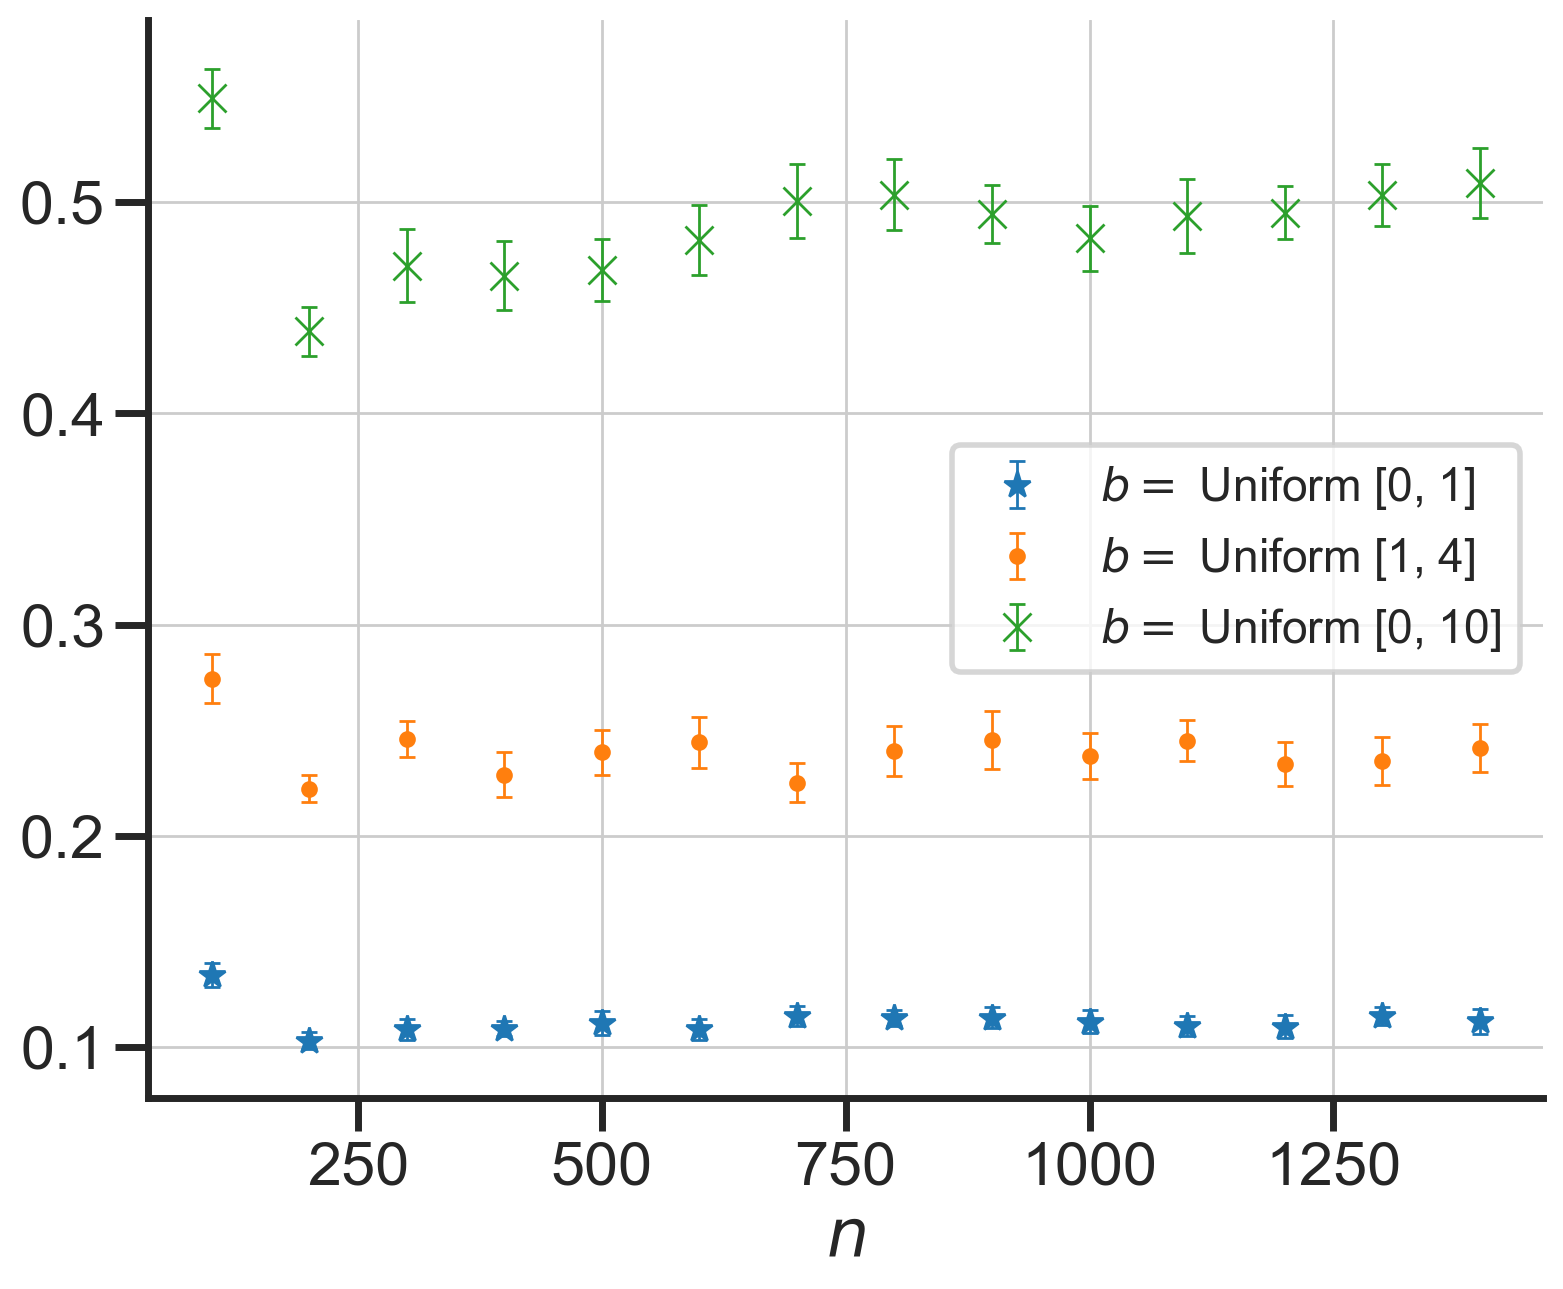

In [17]:
fig, ax = plt.subplots()

# Data for plotting
data = [
    (bound_01, bound_err_01, "*", "$b=$ Uniform [0, 1]"),
    (bound_14, bound_err_14, ".", "$b=$ Uniform [1, 4]"),
    (bound_010, bound_err_010, "x", "$b=$ Uniform [0, 10]"),
]

# Loop through the data and plot
for bound, bound_err, fmt, label in data:
    ax.errorbar(
        range_n,
        bound,
        yerr=bound_err,
        markersize=MARKERSIZE,
        elinewidth=ELINEWIDTH,
        fmt=fmt,
        capsize=CAPSIZE,
        label=label,
    )
ax.set_xlabel("$n$")
ax.legend()
plt.show()